In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import acquire

In [2]:
df = acquire.get_mall_data()

In [3]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info

<bound method DataFrame.info of      customer_id  gender  age  annual_income  spending_score
0              1    Male   19             15              39
1              2    Male   21             15              81
2              3  Female   20             16               6
3              4  Female   23             16              77
4              5  Female   31             17              40
..           ...     ...  ...            ...             ...
195          196  Female   35            120              79
196          197  Female   45            126              28
197          198    Male   32            126              74
198          199    Male   32            137              18
199          200    Male   30            137              83

[200 rows x 5 columns]>

In [5]:
df.dtypes

customer_id        int64
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

Takeaways
1.encode gender
2.drop customer_id
3.define our target variable:spending_score

In [6]:
df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [7]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


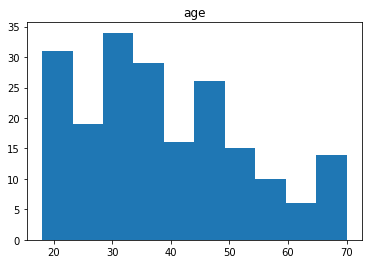

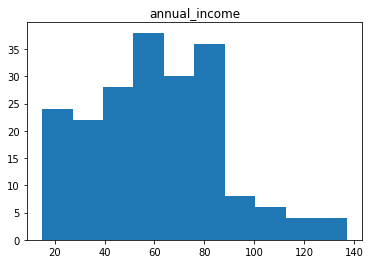

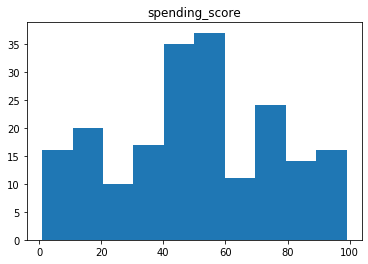

In [8]:
for col in ['age', 'annual_income', 'spending_score']:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

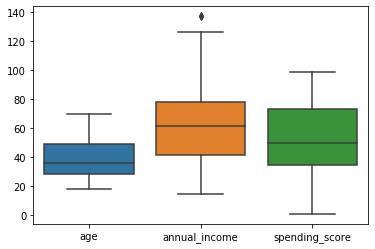

In [9]:
sns.boxplot(data=df[['age', 'annual_income','spending_score']])

In [10]:
df.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [11]:
pd.cut(df.age, bins=4).value_counts()

(17.948, 31.0]    70
(31.0, 44.0]      61
(44.0, 57.0]      43
(57.0, 70.0]      26
Name: age, dtype: int64

In [12]:
pd.qcut(df.age, 4).value_counts()

(28.75, 36.0]      54
(36.0, 49.0]       51
(17.999, 28.75]    50
(49.0, 70.0]       45
Name: age, dtype: int64

In [13]:
pd.cut(df.age, bins=[0,30,50,100]).value_counts()

(30, 50]     98
(0, 30]      62
(50, 100]    40
Name: age, dtype: int64

In [14]:
df['is_female']=(df.gender=='Female').astype('int')
df.head()

,customer_id,gender,age,annual_income,spending_score,is_female
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [15]:
from sklearn.model_selection import train_test_split

train_and_validate, test = train_test_split(df, test_size=.15, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.15, random_state=123)

print('train', train.shape)
print('validate',validate.shape)
print('test', test.shape)


train (144, 6)
validate (26, 6)
test (30, 6)


In [16]:
#### WORKFLOW #####
df = acquire.get_mall_data()

def prep_mall_data(df):
    #takes the acquired mall data, does data prep, and returns
    #train, test, and validate data splits
    df['is_female']=(df.gender=='Female').astype('int')
    train_and_validate, test = train_test_split(df, test_size=.15, random_state=123)
    train, validate = train_test_split(train_and_validate, test_size=.15, random_state=123)
    return train,test,validate

# Regression Exercises
1. Acquire customer_id, monthly_charges, tenure, and total_charges from telco_churn database for all customers with a 2 year contract.


In [17]:
df = acquire.wrangle_telco()
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


2. Walk through the steps above using your new dataframe. You may handle the missing values however you feel is appropriate.

In [18]:
df.isna().sum()

customer_id        0
monthly_charges    0
tenure             0
total_charges      0
dtype: int64

In [19]:
df.shape

(1695, 4)

In [20]:
df.isnull().sum()

customer_id        0
monthly_charges    0
tenure             0
total_charges      0
dtype: int64

In [21]:
df.dtypes

customer_id         object
monthly_charges    float64
tenure               int64
total_charges      float64
dtype: object

In [23]:
#df.total_charges = df.total_charges.str.replace(' ', '0').astype(float)

In [24]:
df.min()

customer_id        0013-SMEOE
monthly_charges          18.4
tenure                      0
total_charges               0
dtype: object

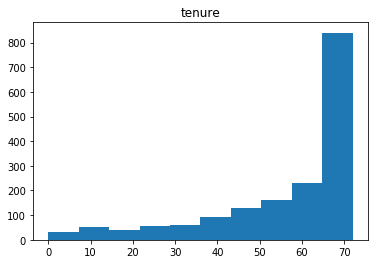

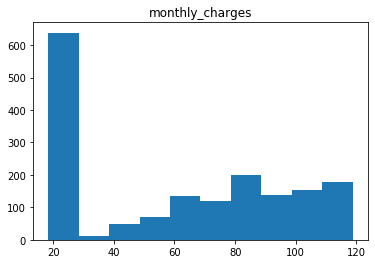

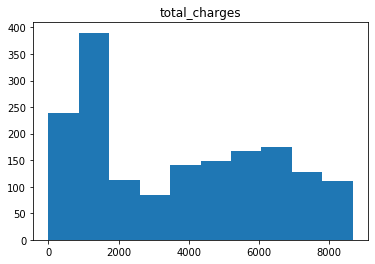

In [25]:
for col in ['tenure', 'monthly_charges', 'total_charges']:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

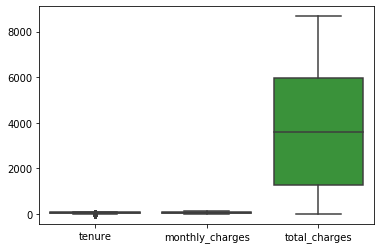

In [26]:
sns.boxplot(data=df[['tenure', 'monthly_charges', 'total_charges']])